## Multi-class Classification

For  this  exercise,  logistic  regression  and  neural  networks  are employed to recognize  handwritten  digits  (from  0  to  9). Automated  handwritten  digit recognition is widely used today - from recognizing zip codes (postal codes) on  mail  envelopes  to  recognizing  amounts  written  on  bank  checks.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy.optimize as opt
import scipy.io as from_octave # used to implement mat file type
import random as rd
import matplotlib.cm as cm # used to display images in a specific colormap
from scipy.misc import toimage # used to convert matrix to image
# Update the matplotlib configuration parameters: 
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'ubuntu'})
% matplotlib inline

## Convert .mat file and prepare data

In [2]:
directory = os.getcwd() + '/ex3data1.mat'
mat = from_octave.loadmat(directory)
y = np.array(mat['y'],dtype='float')
X = np.array(mat['X'],dtype='float')

# setup sime parameters used for the specific excersise
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10 (10 represents 0)
m,n = X.shape 

y.shape, X.shape , np.unique(y)

((5000, 1),
 (5000, 400),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]))

## Visualizing the data

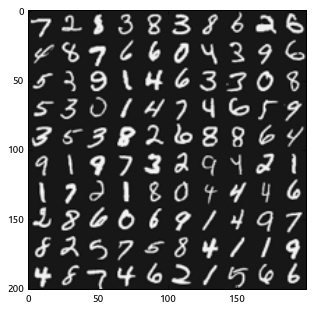

In [3]:
fig = plt.figure(figsize=(5,5))
# initialize an array to store data
data_img = np.array(np.ones(200)).reshape(1,200)
m = X.shape[0]
for i in range(10):
    sel = rd.sample(range(1, m), 10) # randomly select 10 data points
    data1 = X[sel].reshape(200,20).T 
    data_img = np.concatenate([data_img,data1])
img = toimage(data_img) # from scipy.misc library
plt.imshow(img,cmap = cm.Greys_r)


## Cost Function

In [4]:
def sigmoid(x):
    '''
    J = SIGMOID(z) computes the sigmoid of z.
    '''
    return 1/(1+np.exp(-x))

def lrCostFunction(theta,X,y,lambda_):
    '''
    J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
    theta as the parameter for regularized logistic regression and the
    gradient of the cost w.r.t. to the parameters. 
    '''
    m,n = X.shape
    h = sigmoid(X.dot(theta))
    reg = lambda_/(2.*m)*theta.T.dot(theta)
    J = -(y.T.dot(np.log(h))+(1-y).T.dot(np.log(1-h)))*1./m + reg
    return np.asscalar(J)

## Gradient

In [5]:
def gradient(theta,X,y,lambda_):
    '''
    grad = gradient(theta, X, y, lambda) computes the 
    gradient of the cost w.r.t. to the parameters. 
    '''
    m,n = X.shape
    theta = np.matrix(theta).T
    h = sigmoid(X.dot(theta))
    grad = X.T.dot(h-y)
    
    z = np.zeros((n,1))
    z[1:]=1
    reg = lambda_*np.multiply(theta,z)
    
    grad = (grad + reg)/m
    return grad

## One-vs-all Classification

In [6]:
# add bias terms
X_ = np.insert(X, 0, 1,axis=1)
m,n = X_.shape

# initialize theta valus
theta = np.zeros(n)

lambda_ = 0.5

thetas = []
for i in range(1,num_labels+1):
    print "Optimizing for handwritten number {}...".format(i)
    result = opt.fmin_tnc(func=lrCostFunction, 
                           x0=theta, 
                           fprime=gradient, 
                           args=(X_, (y==i).astype(int), lambda_))

    all_theta = result[0]
    thetas.append(all_theta)
print 'finished'


Optimizing for handwritten number 1...
Optimizing for handwritten number 2...
Optimizing for handwritten number 3...
Optimizing for handwritten number 4...
Optimizing for handwritten number 5...
Optimizing for handwritten number 6...
Optimizing for handwritten number 7...
Optimizing for handwritten number 8...
Optimizing for handwritten number 9...
Optimizing for handwritten number 10...
finished


In [7]:
nteta = np.array(thetas)
X_.shape,nteta.shape
accuracy = np.sum((np.argmax(sigmoid(X_.dot(nteta.T)),axis=1)+1).reshape(y.size,1)==y)/float(y.size)
print 'Training Set Accuracy: %{}'.format(accuracy*100)

Training Set Accuracy: %95.02
